In [520]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

plt.rcParams["figure.figsize"]=(15,5)

                                        TALLER #1 - MÉTODOS COMPUTACIONALES

                                        Catalina Flórez y Gabriel Borrero. 

1. Implemente la transformada de Fourier discreta en Python, de acuerdo a la definición

In [521]:
def transf_fourier_d (t_k, y_k,f):
    suma_fourier=0
    for i in range(0,len(t_k)):
        suma_fourier=+suma_fourier+y_k[i]*np.exp(-2*np.pi*1j*t_k[i]*f)
        
    return suma_fourier

Probamos que la implementación de la DFT sea correcta:

In [522]:
t_k=np.linspace(0,20,200)
y_k=np.sin(t_k)
f=0.1

In [523]:
x=transf_fourier_d(t_k,y_k,f)
print(x)
print("la transformada coincide con lo que dicta la teoría")

(10.18289058873271-9.43536532570872j)
la transformada coincide con lo que dicta la teoría


Pregunta 2

 Genere una señal de prueba...

In [524]:
N=100
max=50
t=np.linspace(0,max,N)
y=np.sin(2*np.pi*np.sqrt(2)*t)
f=np.linspace(0,1/((t[1]-t[0])),100)    

In [525]:
norma=abs(transf_fourier_d(t,y,f))
eje_y=np.log10(norma)
eje_y

array([-8.35202469e-03, -7.84701368e-03, -6.32815343e-03, -3.78386139e-03,
       -1.94491315e-04,  4.46819925e-03,  1.02418358e-02,  1.71745139e-02,
        2.53262528e-02,  3.47709109e-02,  4.55986947e-02,  5.79194522e-02,
        7.18670191e-02,  8.76050123e-02,  1.05334651e-01,  1.25305482e-01,
        1.47830383e-01,  1.73307002e-01,  2.02249254e-01,  2.35335050e-01,
        2.73481406e-01,  3.17968194e-01,  3.70653911e-01,  4.34380009e-01,
        5.13804051e-01,  6.17357865e-01,  7.62853877e-01,  1.00008422e+00,
        1.63669786e+00,  1.23374557e+00,  8.39248839e-01,  6.25946644e-01,
        4.75733177e-01,  3.57760960e-01,  2.59248848e-01,  1.73632155e-01,
        9.70731767e-02,  2.71246610e-02, -3.78701693e-02, -9.90743308e-02,
       -1.57308979e-01, -2.13124603e-01, -2.66817538e-01, -3.18400371e-01,
       -3.67527733e-01, -4.13382780e-01, -4.54552804e-01, -4.88975494e-01,
       -5.14107542e-01, -5.27465304e-01, -5.27465304e-01, -5.14107542e-01,
       -4.88975494e-01, -

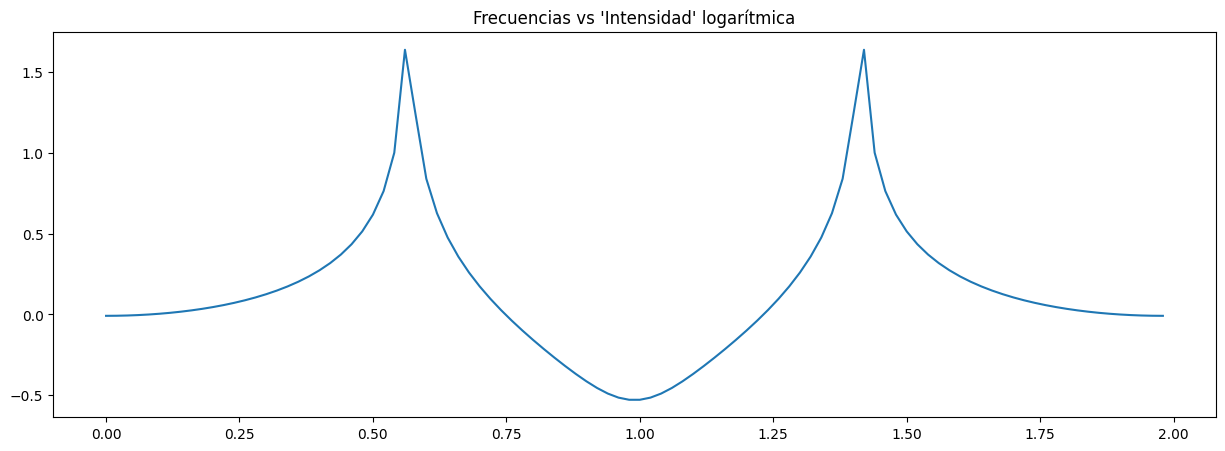

In [526]:
fig, ax = plt.subplots()

plt.plot(f, eje_y)
plt.title("Frecuencias vs 'Intensidad' logarítmica")

plt.show()

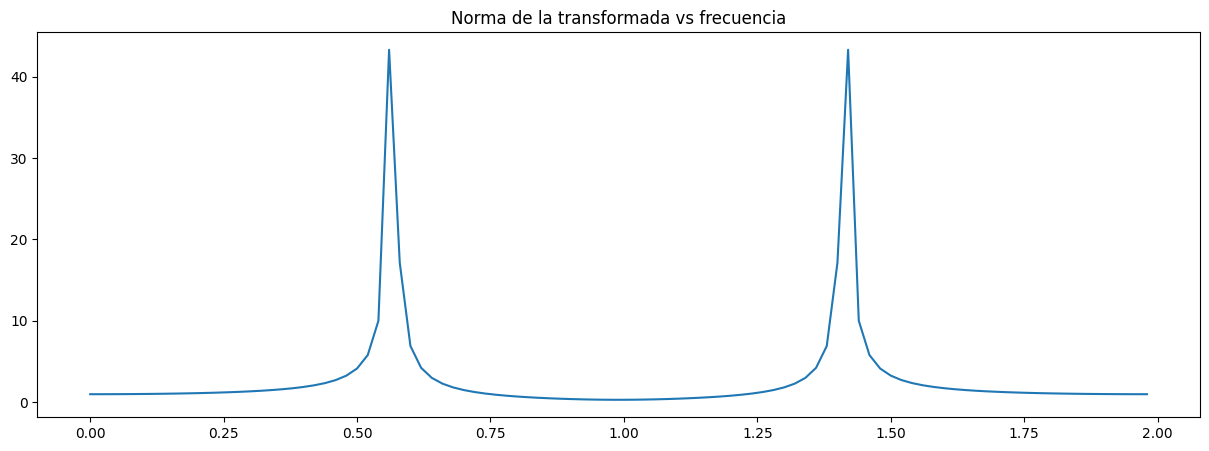

In [527]:
fig, ax = plt.subplots()

plt.plot(f, norma)
plt.title("Norma de la transformada vs frecuencia")

plt.show()

In [528]:
ruido=np.random.normal(0.0,0.1,len(y))
y_ruido=y+ruido

In [529]:
norma_ruido=abs(transf_fourier_d(t,y_ruido,f))
eje_y_ruido=np.log10(norma_ruido)
eje_y_ruido

array([ 0.22549754, -0.36110141,  0.0312763 , -0.73155834,  0.29589217,
        0.13618826,  0.05689879, -0.01116058,  0.09595995,  0.11022182,
        0.34262846,  0.05780573,  0.22749599,  0.24345553,  0.15168806,
        0.1687801 , -0.24972168,  0.17465157,  0.20507036,  0.48444566,
        0.45993109,  0.07563387,  0.41830052,  0.47731018,  0.39417476,
        0.7083034 ,  0.77380101,  0.98559925,  1.64297747,  1.22575459,
        0.80303609,  0.7485505 ,  0.60632659,  0.44802677,  0.42006846,
        0.40252376,  0.23393589,  0.26372469,  0.16881925,  0.30886781,
       -0.29297506, -0.11793785, -0.4318163 ,  0.08231687, -0.45440867,
        0.09466959, -0.18858004, -0.34919771,  0.18547408, -0.03459021,
       -0.03459021,  0.18547408, -0.34919771, -0.18858004,  0.09466959,
       -0.45440867,  0.08231687, -0.4318163 , -0.11793785, -0.29297506,
        0.30886781,  0.16881925,  0.26372469,  0.23393589,  0.40252376,
        0.42006846,  0.44802677,  0.60632659,  0.7485505 ,  0.80

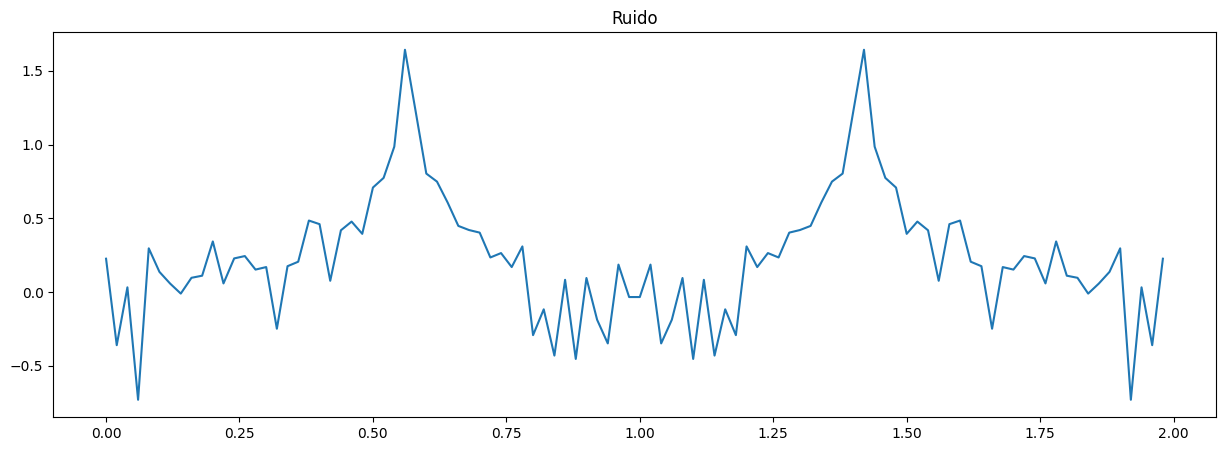

In [530]:
fig, ax = plt.subplots()

plt.plot(f, eje_y_ruido)
plt.title("Ruido")

plt.show()

¿Qué sucede si le agrega ruido a la señal en 𝑦?

Si se le agrega ruido a la señal en 𝑦, esta se vuelve menos 'nítida' y se vuelve más complicado identificar la señal principal. Es decir, 
Cuando se añade ruido a la señal, el espectro de frecuencias se expande, lo que complica la identificación de la frecuencia fundamental que caracteriza a la señal original. Esto se debe a que el ruido se dispersa a lo largo de un amplio rango de frecuencias, provocando que la señal original pierda claridad y se vea afectada en su integridad. De esta manera, la capacidad para distinguir las características esenciales de la señal es considerablemente más complicado. 

Pregunta 3

Para la señal de prueba del punto anterior, y con el algoritmo de su elección, encuentre el pico prin
cipal de la norma de la transformada, y estime el ancho a media altura (FWHM).

In [531]:
N=100
max=50
t=np.linspace(0,max,N)
y=np.sin(2*np.pi*np.sqrt(2)*t)
f=np.linspace(0,1/((t[1])),100)   

In [532]:
norma=abs(transf_fourier_d(t,y,f))
eje_y=np.log10(norma)

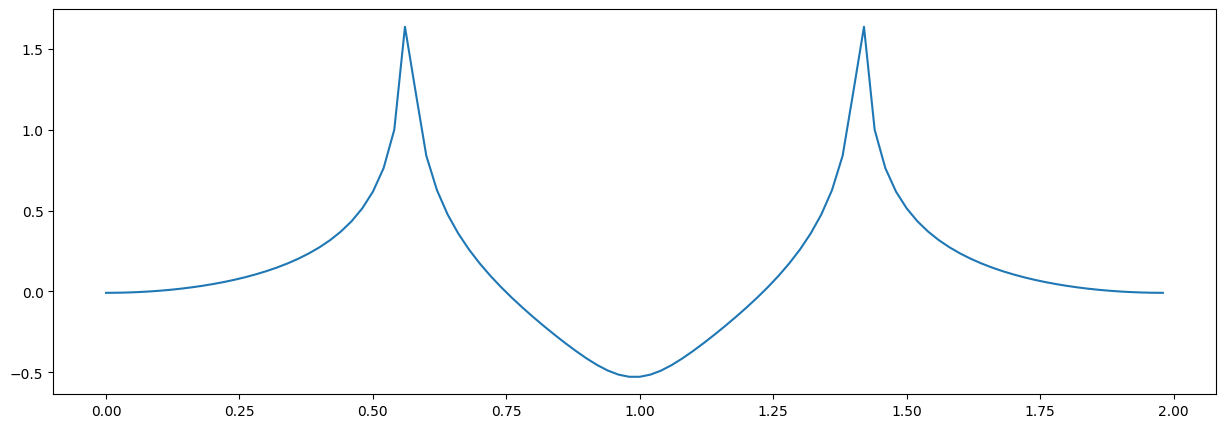

In [533]:
fig, ax = plt.subplots()
plt.plot(f, eje_y)
plt.show()

In [534]:
max_y=eje_y.min()
for i in range(0,len(eje_y)):
    if eje_y[i] == eje_y.max():
        max_f=f[i] #pico para gráfica f vs 'y' log
        
max_y_=eje_y.max()

print("El pico principal de de la norma de la transformada para la frecuencia es " + str(max_f) + " y "+str(max_y_)+ " para la intensidad en escala logarítmica")

El pico principal de de la norma de la transformada para la frecuencia es 0.56 y 1.6366978641545094 para la intensidad en escala logarítmica


In [535]:
media_altura_y=eje_y.min()+((eje_y.max()-eje_y.min())/2)
idx=np.argmin(abs(abs(eje_y)-media_altura_y))
ancho=abs(f[idx]-f[np.argmax(eje_y)])



In [536]:
peak_idx = np.argmax(eje_y)
left_idx = np.where(eje_y[:peak_idx] <= media_altura_y)[0]
right_idx = np.where(eje_y[peak_idx:] <= media_altura_y)[0]

if len(left_idx) == 0 or len(right_idx) == 0:
    
    fwhm=0
    
left_idx = left_idx[-1]  # Último índice a la izquierda del pico
right_idx = right_idx[0] + peak_idx  # Primer índice a la derecha del pico

fwhm = f[right_idx] - f[left_idx]

print("El ancho a media altura es " + str(fwhm))

El ancho a media altura es 0.16000000000000003


incisos a y b del punto 3:

Al variar el número de muestras N o el rango de tiempo t, el pico principal de la transformada de Fourier no varió. Esto se debe a que la frecuencia fundamental de la señal está determinada por la propia señal y no por la cantidad de muestras que tomemos o el tiempo total de la medición.

Efecto de Variar N 

1. Posición del Pico: 
   - Al aumentar N encontramos una mayor resolución en el dominio de la frecuencia, lo que permitió que pudiésemos observar más detalles en el espectro, pero la posición del pico principal (es decir, la frecuencia dominante) no cambió. Esto se debe a que la posición está intrínsecamente ligada a las propiedades de la señal original.

2. Ancho a Media Altura (FWHM):
   - El ancho a media altura (FWHM), no cambió al variar N. Esto se debe a que el FWHM está controlado principalmente por el rango temporal tmax y no por la cantidad de muestras. Al aumentar N, lo que logramos es una representación más detallada del espectro de frecuencias (más puntos en el gráfico), pero el ancho del pico permanece constante, tal como lo comprobamos mediante código. 

Efecto de Variar tmax:

1. Posición del Pico:
   - Al aumentar el rango temporal tmax, disminuye la resolución en frecuencia, lo que provocó un desplazamiento ligeramente la posición aparente del pico en el espectro de Fourier debido a la menor resolución. Sin embargo, en general, la posición del pico principal se mantuvo cercano a su valor original porque la frecuencia fundamental de la señal no cambió. 

2. Ancho a Media Altura (FWHM):
   - Al aumentar tmax, el FWHM disminuyó. Esto ocurre porque una mayor duración de observación de la señal reduce la incertidumbre en la medida de la frecuencia, lo que se traduce en un pico más agudo y, por tanto, un FWHM más estrecho. En términos simples, estamos "afinando" la precisión de la medición de la frecuencia cuando observamos la señal durante más tiempo.


En pocas palabras: 

- Cambiar N: Aumentar N  mejora la resolución en el espectro de frecuencias sin cambiar la posición del pico principal ni su FWHM.
- Cambiar tmax: Aumentar tmax puede ajustar ligeramente la posición del pico debido a la resolución en frecuencia, sin llegar a moverlo considerablemente, pero lo más significativo es que reduce el FWHM, haciendo el pico más definido.



Pregunta 4

In [537]:
N = 80
#Nyq=N/10
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
Nyq=1/(ts_0[1])
fs = np.arange(0,Nyq,0.01)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)


In [538]:
norma=abs(transf_fourier_d(ts,ys,fs))

pico=fs[np.argmax(norma)]
print("la frecuencia principal/pico de la señal es "+str(pico))

la frecuencia principal/pico de la señal es 6.29


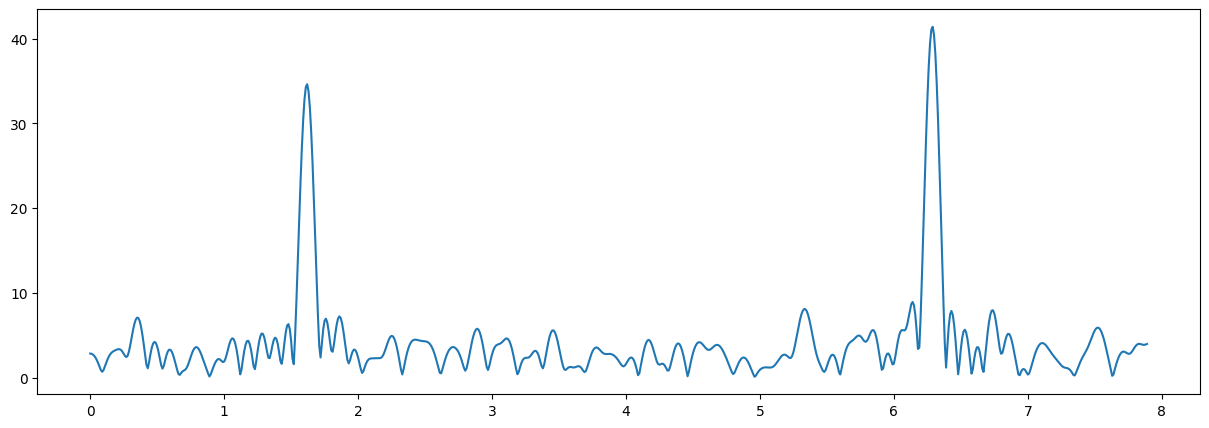

In [539]:
plt.plot(fs, norma)
plt.show()

 ¿Es posible recuperar la frecuencia original? ¿Por qué?
 
 Sí, se puede recuperar la frecuencia original. Esto ocurre porque al introducir ruido en la variable de tiempo t, se altera la uniformidad del muestreo, lo que reduce el aliasing que normalmente se produce con un muestreo regular. Esta alteración permite obtener más detalles sobre la señal, lo que hace posible identificar frecuencias más altas, incluso aquellas que superan el límite de Nyquist.

 A continuación mostramos 2 ejemplos sobre cómo la frecuencia principal/pico de la señal sigue siendo la misma al evaluar la transformada hasta varias veces la frecuencia de Nyquist. En ambos casos (como lo indica la teoría), la frecuencia principal no varió:

In [540]:
N = 80
#Nyq=N/10
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
Nyq=1/ts_0[1]
fs = np.arange(0, 5*Nyq, 0.01) #5 VECES LAS FRECUENCIA DE NYQUIST
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)

norma=abs(transf_fourier_d(ts,ys,fs))

pico=fs[np.argmax(norma)]
print("la frecuencia principal/pico de la señal es "+str(pico))

la frecuencia principal/pico de la señal es 6.28


In [541]:
N = 80
#Nyq=N/10
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
Nyq=1/ts_0[1]
fs = np.arange(0,10*Nyq,0.01) #10 VECES LA FRECUENCIA DE NYQUIST
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)

norma=abs(transf_fourier_d(ts,ys,fs))

pico=fs[np.argmax(norma)]
print("la frecuencia principal/pico de la señal es "+str(pico))

la frecuencia principal/pico de la señal es 6.28


Pregunta 5 --- Bono

In [542]:
url="https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
columnas = ['t', 'y', '𝜎_y']
df = pd.read_csv(url, sep='\\s+', header=None,names=columnas)
df['y']-=df['y'].mean()
df


,t,y,𝜎_y
0,5262.50650,-0.130449,0.018
1,5264.50830,0.046551,0.017
2,5265.59327,-0.159449,0.018
3,5266.50460,-0.179449,0.019
4,5267.50409,-0.082449,0.019
...,...,...,...
396,7458.59979,0.098551,0.016
397,7465.50239,-0.181449,0.013
398,7471.53717,0.173551,0.030
399,7475.51366,0.171551,0.017


In [543]:
fs=np.linspace(0,5,40000)
norma=abs(transf_fourier_d(df['t'],df['y'],fs))

f_ppal=fs[np.argmax(norma)]
print("la frecuencia principal es: " +str(f_ppal))

la frecuencia principal es: 3.2592064801620038


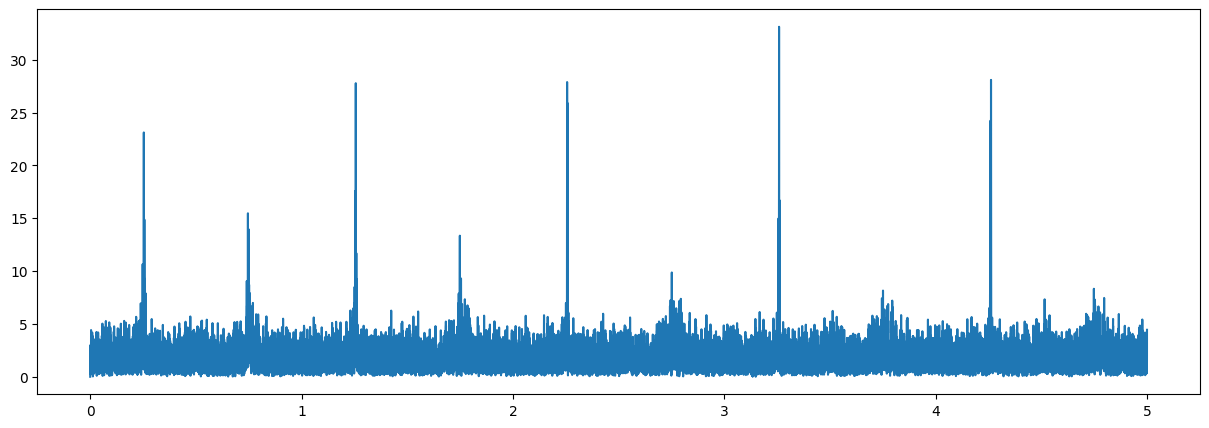

In [544]:
plt.plot(fs, norma)
plt.show()

In [545]:
phi=np.mod(df['t']*f_ppal,1)
phi

0      0.595287
1      0.119566
2      0.655707
3      0.625920
4      0.883464
         ...   
396    0.116769
397    0.613767
398    0.282361
399    0.242563
400    0.312588
Name: t, Length: 401, dtype: float64

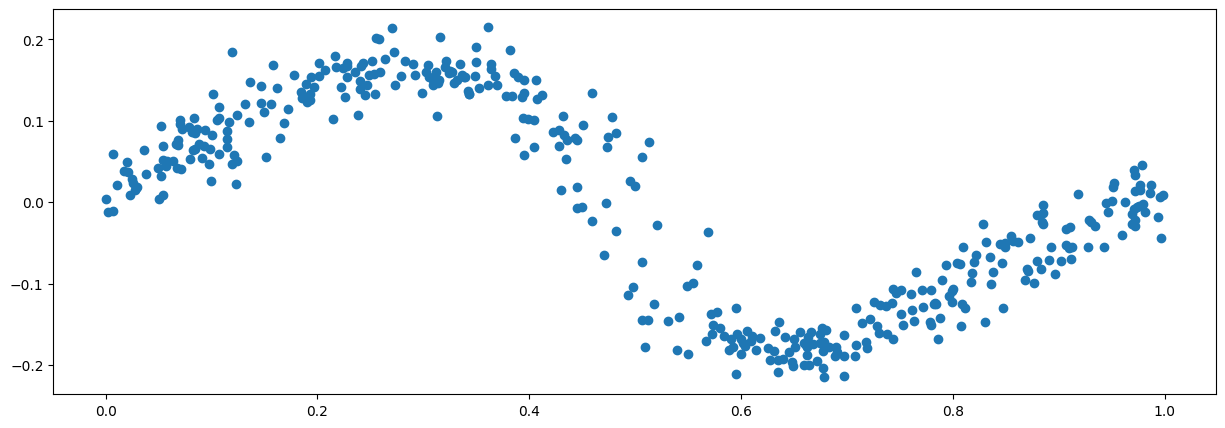

In [546]:
plt.scatter(phi,df['y'])